## <div align="center"> TUGAS LAB IS794 DEEP LEARNING </div>
### <div align="center"> WEEK [13] : [Best Practice Deep Learning] </div>

#### <div align="center"> Semester Ganjil 2023/2024 </div>

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model(hp):
    units = hp.Int(name="units", min_value=16, max_value=64, step=16)
    model = keras.Sequential([
        layers.Dense(units, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    optimizer = hp.Choice(name="optimizer", values=["rmsprop","adam"])
    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])
    return model

In [4]:
import kerastuner as kt

class SimpleMLP(kt.HyperModel):
    def __init__(self, num_classes):
        self.num_classes = num_classes
        
    def build(self, hp):
        units = hp.Int(name="units", min_value=16, max_value=64, step=16)
        model = keras.Sequential([
            layers.Dense(units, activation="relu"),
            layers.Dense(self.num_classes, activation="softmax")
        ])
        optimizer = hp.Choice(name="optimizer", values=["rmsprop", "adam"])
        model.compile(
            optimizer-optimizer,
            loss="sparse_categorical_crossentropy" ,
            metrics=[ "accuracy" ] )
        return model

hypermodel = SimpleMLP(num_classes=10)
tuner = kt.BayesianOptimization(
    build_model,
    objective="val_accuracy",
    max_trials=10,
    executions_per_trial=2,
    directory="mnist_kt_test",
    overwrite=True,
)

In [5]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 16, 'sampling': 'linear'}
optimizer (Choice)
{'default': 'rmsprop', 'conditions': [], 'values': ['rmsprop', 'adam'], 'ordered': False}


In [9]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape((-1, 28 * 28)).astype("float32") / 255
x_test = x_test.reshape((-1, 28 * 28)).astype("float32") /255
x_train_full = x_train[:]
y_train_full = y_train[:]
num_val_samples = 10000
x_train, x_val = x_train[:-num_val_samples], x_train[-num_val_samples:]
y_train, y_val = y_train[:-num_val_samples], y_train[-num_val_samples:]
#KERAS CALLBACKS
callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=5),
]
tuner. search(
    x_train, y_train,
    batch_size=128,
    epochs=20,
    validation_data=(x_val, y_val),
    callbacks=callbacks,
    verbose=2,
)

Trial 10 Complete [00h 00m 48s]
val_accuracy: 0.974949985742569

Best val_accuracy So Far: 0.9754500091075897
Total elapsed time: 00h 08m 16s


In [11]:
top_n = 4
best_hps = tuner.get_best_hyperparameters(top_n)

In [12]:
def get_best_epoch(hp):
    model = build_model(hp)
    callbacks=[
        keras.callbacks.EarlyStopping(
            monitor="val_loss", mode="min", patience=10)
    ]
    history = model.fit(
        x_train, y_train,
        validation_data=(x_val, y_val),
        epochs=10,
        batch_size=128,
        callbacks=callbacks)
    val_loss_per_epoch = history.history["val_loss"]
    best_epoch = val_loss_per_epoch.index(min(val_loss_per_epoch))+1
    print(f"Best epoch: {best_epoch}")
    return best_epoch

In [13]:
def get_best_trained_model(hp):
    best_epoch = get_best_epoch(hp)
    model = build_model(hp)
    model.fit(
        x_train_full, y_train_full,
        batch_size=128, epochs=int(best_epoch * 1.2))
    return model

best_models = []
for hp in best_hps:
    model = get_best_trained_model(hp)
    model.evaluate(x_test, y_test)
    best_models.append(model)

Epoch 1/10
391/391 [==============================] - 2s 3ms/step - loss: 0.4379 - accuracy: 0.8827 - val_loss: 0.2550 - val_accuracy: 0.9306
Epoch 2/10
391/391 [==============================] - 1s 3ms/step - loss: 0.2300 - accuracy: 0.9341 - val_loss: 0.1910 - val_accuracy: 0.9473
Epoch 3/10
391/391 [==============================] - 1s 3ms/step - loss: 0.1798 - accuracy: 0.9488 - val_loss: 0.1650 - val_accuracy: 0.9544
Epoch 4/10
391/391 [==============================] - 1s 2ms/step - loss: 0.1493 - accuracy: 0.9568 - val_loss: 0.1440 - val_accuracy: 0.9603
Epoch 5/10
391/391 [==============================] - 1s 3ms/step - loss: 0.1285 - accuracy: 0.9632 - val_loss: 0.1344 - val_accuracy: 0.9632
Epoch 6/10
391/391 [==============================] - 1s 3ms/step - loss: 0.1121 - accuracy: 0.9679 - val_loss: 0.1305 - val_accuracy: 0.9630
Epoch 7/10
391/391 [==============================] - 1s 3ms/step - loss: 0.0989 - accuracy: 0.9716 - val_loss: 0.1167 - val_accuracy: 0.9670
Epoch 

391/391 [==============================] - 2s 3ms/step - loss: 0.4526 - accuracy: 0.8761 - val_loss: 0.2385 - val_accuracy: 0.9336
Epoch 2/10
391/391 [==============================] - 1s 3ms/step - loss: 0.2281 - accuracy: 0.9358 - val_loss: 0.1860 - val_accuracy: 0.9481
Epoch 3/10
391/391 [==============================] - 1s 3ms/step - loss: 0.1768 - accuracy: 0.9504 - val_loss: 0.1589 - val_accuracy: 0.9573
Epoch 4/10
391/391 [==============================] - 1s 3ms/step - loss: 0.1467 - accuracy: 0.9577 - val_loss: 0.1439 - val_accuracy: 0.9592
Epoch 5/10
391/391 [==============================] - 1s 2ms/step - loss: 0.1255 - accuracy: 0.9643 - val_loss: 0.1280 - val_accuracy: 0.9633
Epoch 6/10
391/391 [==============================] - 1s 3ms/step - loss: 0.1086 - accuracy: 0.9699 - val_loss: 0.1182 - val_accuracy: 0.9658
Epoch 7/10
391/391 [==============================] - 1s 3ms/step - loss: 0.0971 - accuracy: 0.9715 - val_loss: 0.1086 - val_accuracy: 0.9677
Epoch 8/10
391/39

In [14]:
best_models = tuner.get_best_models(top_n)

summary = tuner.results_summary(num_trials=top_n)

Results summary
Results in mnist_kt_test\untitled_project
Showing 4 best trials
Objective(name="val_accuracy", direction="max")

Trial 08 summary
Hyperparameters:
units: 64
optimizer: rmsprop
Score: 0.9754500091075897

Trial 06 summary
Hyperparameters:
units: 64
optimizer: rmsprop
Score: 0.9749999940395355

Trial 09 summary
Hyperparameters:
units: 64
optimizer: rmsprop
Score: 0.974949985742569

Trial 05 summary
Hyperparameters:
units: 64
optimizer: adam
Score: 0.9737499952316284


In [15]:
import sklearn
import xgboost as xgb
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

In [17]:
train = pd.read_csv('titanic_train.csv', delimiter=",")
test = pd.read_csv('titanic_test.csv', delimiter=",")

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,5123.292,NaN,C
1,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,5123.292,B51 B53 B55,C
2,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,5123.292,B101,C
3,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,2475.208,B58 B60,C
4,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,2475.208,B58 B60,C
5,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,2217.792,C95,S
6,690,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,2113.375,B5,S
7,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,2113.375,B5,S
8,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,2113.375,B3,S
9,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,1648.667,C7,S


In [18]:
full_dataset = [train, test]

train["Name_length"] = train["Name"].apply(len)
test["Name_length"] = test["Name"].apply(len)

def get_title(name):
    title_search = re.search(" ([A-Za-z]+)\.", name)
    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_dataset:
    dataset["Title"] = dataset["Name"].apply(get_title)

In [19]:
for dataset in full_dataset:
    dataset["Title"] = dataset["Title"].replace(["Lady", "Countess", "Capt", "Col", "Don", "Dr", "Major", "Rev", "Sir", "Jonkheer", "Dona"], "Rare")
    dataset["Title"] = dataset["Title"].replace("Mlle", "Miss")
    dataset["Title"] = dataset["Title"].replace("Ms", "Miss")
    dataset["Title"] = dataset["Title"].replace("Mme", "Mrs")
    
full_dataset[0].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length,Title
0,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,5123.292,NaN,C,16,Miss
1,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,5123.292,B51 B53 B55,C,34,Mr
2,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,5123.292,B101,C,22,Mr
3,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,2475.208,B58 B60,C,24,Mr
4,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,2475.208,B58 B60,C,47,Mrs
5,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,2217.792,C95,S,18,Mr
6,690,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,2113.375,B5,S,33,Miss
7,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,2113.375,B5,S,29,Miss
8,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,2113.375,B3,S,53,Mrs
9,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,1648.667,C7,S,24,Miss


In [20]:
train["Has_Cabin"] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test["Has_Cabin"] = test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

for dataset in full_dataset:
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1
    
for dataset in full_dataset:
    dataset["IsAlone"] = 0
    dataset.loc[dataset["FamilySize"] == 1, "IsAlone"] = 1
    
for dataset in full_dataset:
    dataset["Embarked"] = dataset["Embarked"].fillna("S")
    
for dataset in full_dataset:
    dataset["Fare"] = dataset["Fare"].fillna(train["Fare"].median())
    
train["CategoricalFare"] = pd.qcut(train["Fare"], 4)

In [21]:
for dataset in full_dataset:
    age_avg = dataset["Age"].mean()
    age_std = dataset["Age"].std()
    age_null_count = dataset["Age"].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset["Age"][np.isnan(dataset["Age"])] = age_null_random_list
    dataset["Age"] = dataset["Age"].astype(int)
train["CategoricalAge"] = pd.cut(train["Age"], 5)

In [22]:
for dataset in full_dataset:
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset["Title"] = dataset["Title"].map(title_mapping)
    dataset["Title"] = dataset["Title"].fillna(0)
    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 ;
    
    dataset["Sex"] = dataset["Sex"].map( {"female": 0, "male": 1} ).astype(int)
    
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [23]:
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
train = train.drop(drop_elements, axis = 1)
train = train.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)
test  = test.drop(drop_elements, axis = 1)

training_cols = ["Survived", "Pclass", "Sex", "Age", "Parch", "Fare", "Embarked",
                 "Name_length", "Has_Cabin", "FamilySize", "IsAlone", "Title"]

train.head(10)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Name_length,Title,Has_Cabin,FamilySize,IsAlone
0,1,1,0,2,0,3,1,16,2,0,1,1
1,1,1,1,2,1,3,1,34,1,1,2,0
2,1,1,1,2,0,3,1,22,1,1,1,1
3,0,1,1,1,1,3,1,24,1,1,2,0
4,1,1,0,3,1,3,1,47,3,1,2,0
5,0,1,1,2,0,3,0,18,1,1,1,1
6,1,1,0,0,1,3,0,33,2,1,2,0
7,1,1,0,1,0,3,0,29,2,1,1,1
8,1,1,0,2,1,3,0,53,3,1,2,0
9,1,1,0,1,2,3,0,24,2,1,3,0


<Axes: title={'center': 'Pearson Correlation of Features'}>

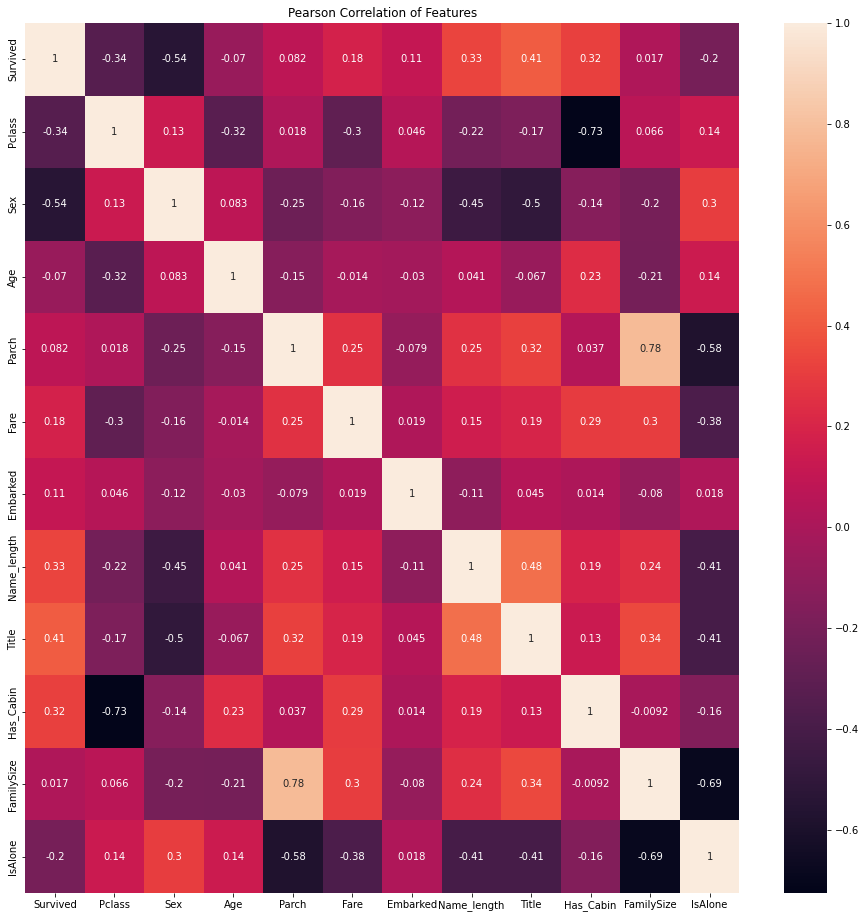

In [24]:
colormap = plt.cm.RdBu
plt.figure(figsize=(16,16))
plt.title('Pearson Correlation of Features')
sns.heatmap(train.astype(float).corr(),annot=True)

In [25]:
class ClassifierModel(object):
    def __init__(self, clf, params=None):
        self.clf = clf(**params)
       
    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)
       
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        return self.clf.fit(x,y).feature_importances_
    
    def predict(self, x):
        return self.clf.predict(x)

In [26]:
y_train = train['Survived'].ravel()
train = train.drop(['Survived'], axis=1)
x_train = train.values
x_test = test.values

In [27]:
def trainModel(model, x_train, y_train, x_test, n_folds, seed):
    cv = KFold(n_splits= n_folds, random_state=seed, shuffle=True)
    scores = cross_val_score(model.clf, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    y_pred = cross_val_predict(model.clf, x_train, y_train, cv=cv, n_jobs=-1)
    return scores, y_pred

In [28]:
rf_params = {
    'n_estimators': 400,
    'max_depth': 5,
    'min_samples_leaf': 3,
    'max_features': 'sqrt'
}
rfc_model = ClassifierModel(clf=RandomForestClassifier, params=rf_params)
rfc_scores, rfc_train_pred = trainModel(rfc_model, x_train, y_train, x_test, 5, 0)
rfc_scores

rfc_features = rfc_model.feature_importances(x_train, y_train)
rfc_features

array([0.12254899, 0.27516319, 0.02426325, 0.01515672, 0.02119318,
       0.01919173, 0.08565346, 0.28609456, 0.06904303, 0.06998665,
       0.01170524])

In [29]:
et_params = {
    'n_jobs': -1,
    'n_estimators': 400,
    'max_depth': 5,
    'min_samples_leaf': 2,
}
etc_model = ClassifierModel(clf=ExtraTreesClassifier, params=et_params)
etc_scores, etc_train_pred = trainModel(etc_model, x_train, y_train, x_test, 5, 0)
etc_scores

etc_features = etc_model.feature_importances(x_train, y_train)
etc_features

array([0.12717617, 0.45305933, 0.01433142, 0.00951053, 0.02008745,
       0.01840561, 0.0320274 , 0.17677197, 0.09782791, 0.0286102 ,
       0.022192  ])

In [30]:
ada_params = {
    'n_estimators': 400,
    'learning_rate': 0.65
}
ada_model = ClassifierModel(clf=AdaBoostClassifier, params=ada_params)
ada_scores, ada_train_pred = trainModel(ada_model, x_train, y_train, x_test, 5, 0)
ada_scores
ada_features = ada_model.feature_importances(x_train, y_train)
ada_features

array([0.035 , 0.015 , 0.025 , 0.08  , 0.04  , 0.0125, 0.6325, 0.085 ,
       0.0075, 0.065 , 0.0025])

In [31]:
gb_params = {
    'n_estimators': 400,
    'max_depth': 6,
}
gbc_model = ClassifierModel(clf=GradientBoostingClassifier, params=gb_params)
gbc_scores, gbc_train_pred = trainModel(gbc_model, x_train, y_train, x_test, 5, 0)
gbc_scores
gbc_features = gbc_model.feature_importances(x_train, y_train)
gbc_features

array([0.07856362, 0.01012165, 0.04642979, 0.01674498, 0.04893203,
       0.03131883, 0.20286307, 0.4050329 , 0.0385394 , 0.11413458,
       0.00731915])

In [32]:
svc_params = {
    'kernel': 'linear',
    'C': 0.025,
    }
svc_model = ClassifierModel(clf=SVC, params=svc_params)
svc_scores, svc_train_pred = trainModel(svc_model, x_train, y_train, x_test, 5, 0)
svc_scores

array([0.79888268, 0.82022472, 0.81460674, 0.8258427 , 0.80898876])

In [38]:
import pandas as pd

# Assuming rfc_features, etc_features, ada_features, and gbc_features are lists of numeric values
feature_dataframe = pd.DataFrame({
    'features': train.columns.values,
    'Random Forest feature importances': rfc_features,
    'Extra Trees feature importances': etc_features,
    'AdaBoost feature importances': ada_features,
    'Gradient Boost feature importances': gbc_features
})

# Calculate mean along axis 1 with error handling
try:
    feature_dataframe['mean'] = feature_dataframe.iloc[:, 1:].mean(axis=1)
except TypeError as e:
    print(f"Error: {e}")
    # Handle the error or print additional information for debugging

# Display the resulting dataframe
print(feature_dataframe)


       features  Random Forest feature importances   
0        Pclass                           0.122549  \
1           Sex                           0.275163   
2           Age                           0.024263   
3         Parch                           0.015157   
4          Fare                           0.021193   
5      Embarked                           0.019192   
6   Name_length                           0.085653   
7         Title                           0.286095   
8     Has_Cabin                           0.069043   
9    FamilySize                           0.069987   
10      IsAlone                           0.011705   

    Extra Trees feature importances  AdaBoost feature importances   
0                          0.127176                        0.0350  \
1                          0.453059                        0.0150   
2                          0.014331                        0.0250   
3                          0.009511                        0.0800   
4     

In [39]:
acc_pred_train = pd.DataFrame({'RandomForest': rfc_scores.ravel(),
    'ExtraTrees': etc_scores.ravel(),
    'AdaBoost': ada_scores.ravel(),
    'GradientBoost': gbc_scores.ravel()
    })
acc_pred_train.head()

,RandomForest,ExtraTrees,AdaBoost,GradientBoost
0,0.826816,0.815642,0.804469,0.770950
1,0.842697,0.842697,0.808989,0.814607
2,0.837079,0.820225,0.814607,0.792135
3,0.820225,0.797753,0.814607,0.764045
4,0.820225,0.831461,0.797753,0.797753


In [40]:
x_train = np.column_stack((etc_train_pred, rfc_train_pred, ada_train_pred, gbc_train_pred, svc_train_pred))
x_train.shape

(891, 5)

In [41]:
def trainStackModel(x_train, y_train, x_test, n_folds, seed):
    cv = KFold(n_splits=n_folds, random_state=seed, shuffle=True)
    gbm = xgb.XGBClassifier(
        n_estimators= 2000,
        max_depth= 4,
        min_child_weight= 2,
        gamma=0.9,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        scale_pos_weight=1).fit(x_train, y_train)
   
    scores = cross_val_score(gbm, x_train, y_train, scoring='accuracy', cv=cv)
    return scores
stackModel_scores = trainStackModel(x_train, y_train, x_test, 5, 0)

In [42]:
acc_pred_train['stackingModel'] = stackModel_scores
acc_pred_train

,RandomForest,ExtraTrees,AdaBoost,GradientBoost,stackingModel
0,0.826816,0.815642,0.804469,0.770950,0.810056
1,0.842697,0.842697,0.808989,0.814607,0.825843
2,0.837079,0.820225,0.814607,0.792135,0.842697
3,0.820225,0.797753,0.814607,0.764045,0.803371
4,0.820225,0.831461,0.797753,0.797753,0.825843
